#  Task 6 Assignment
>AUTHOR : Aashish Ghimire\
>Prediction using Decision Tree Algorithm\
>Create the Decision Tree classifier and visualize it graphically.


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pydot
import sklearn.metrics as sm
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.model_selection import train_test_split
from IPython.display import Image

In [2]:
iris = pd.read_csv('./Iris.csv')

In [3]:
iris.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
iris1 = load_iris()
x=iris1.data[:,:] 
y=iris1.target

In [5]:
iris1['data']

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

#*Exploratory Data Analysis*

In [6]:
data = iris.drop('Id', axis=1)

In [7]:
data.shape

(150, 5)

In [8]:
data.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


#*Data Visualization*

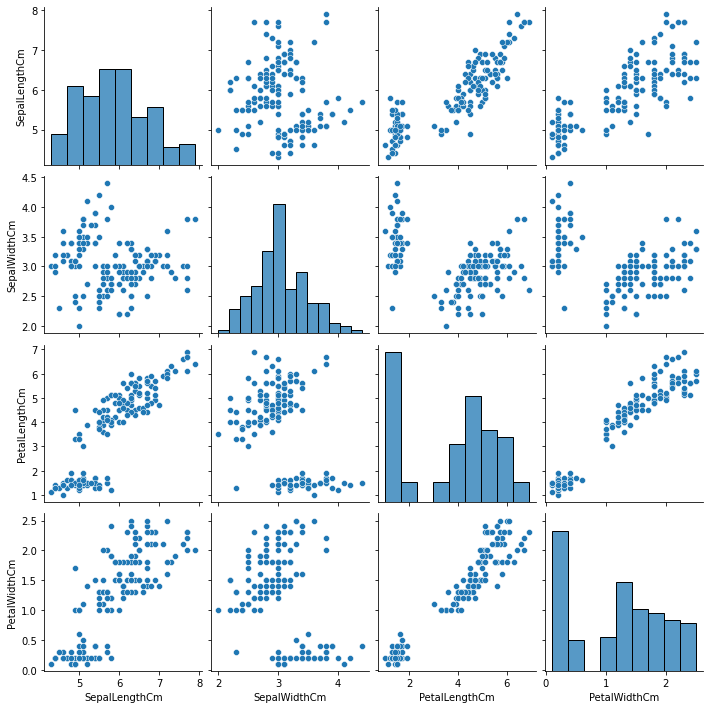

In [9]:
sns.pairplot(data)

## Scatter plot of data based on Sepal Length and Width features

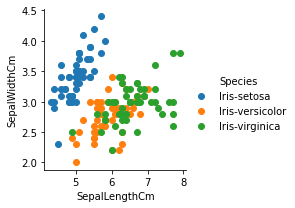

In [10]:
sns.FacetGrid(data,hue='Species').map(plt.scatter,'SepalLengthCm','SepalWidthCm').add_legend()
plt.show()

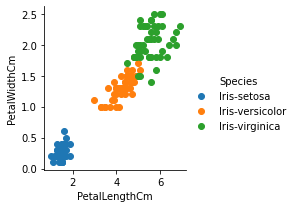

In [11]:
sns.FacetGrid(data,hue='Species').map(plt.scatter,'PetalLengthCm','PetalWidthCm').add_legend()
plt.show()

In [12]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42) 
tree_classifier = DecisionTreeClassifier()
tree_classifier.fit(x_train,y_train)
print("Training Was Successful.")
y_pred = tree_classifier.predict(x_test)

Training Was Successful.


In [13]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred}) 
df.head(10)

,Actual,Predicted
0,1,1
1,0,0
2,2,2
3,1,1
4,1,1
5,0,0
6,1,1
7,2,2
8,1,1
9,1,1


#*Visualizing the Trained Model*

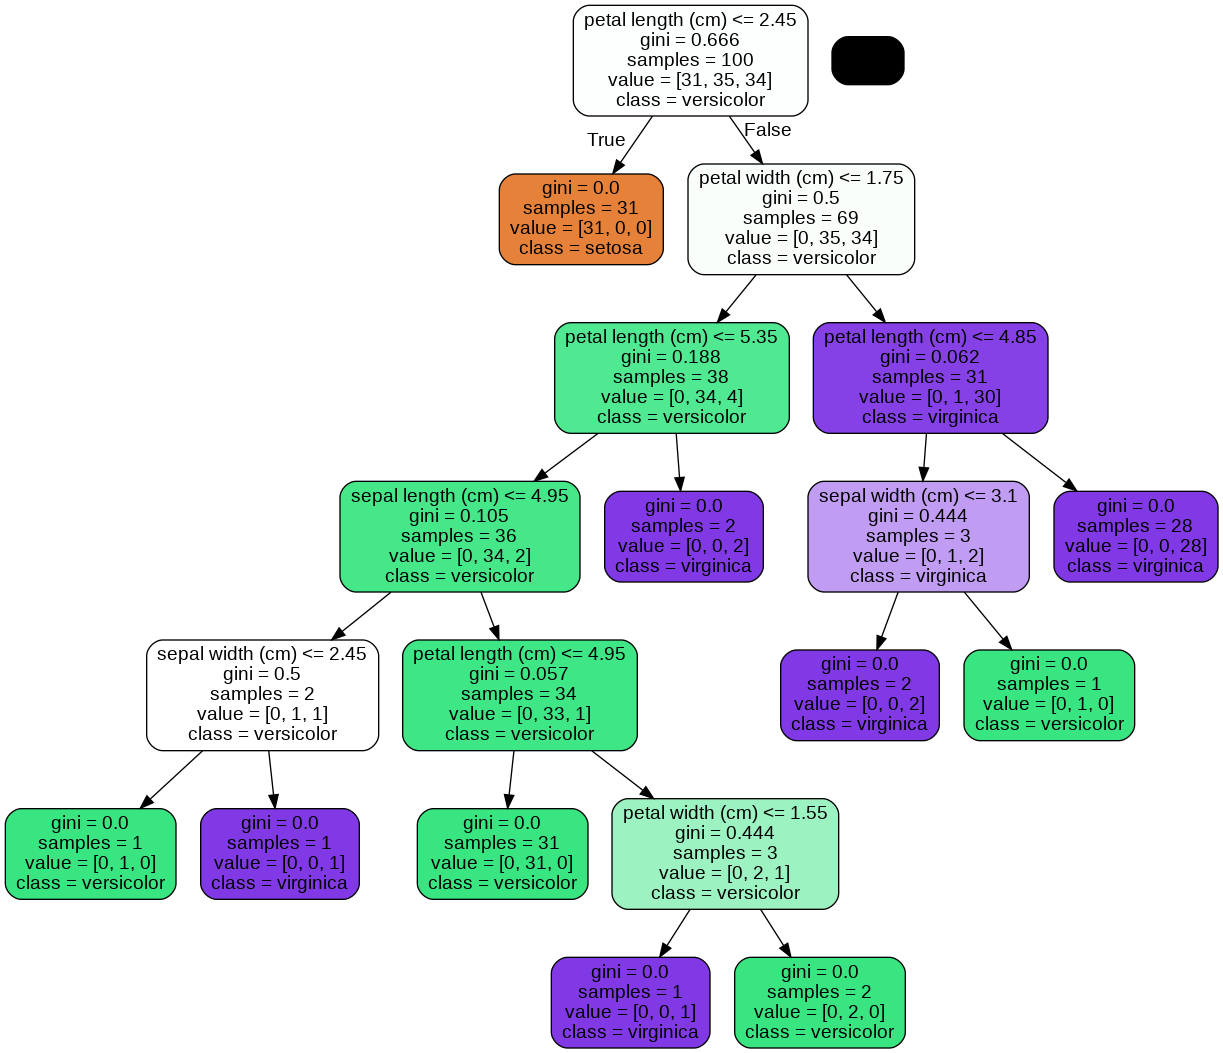

In [15]:
export_graphviz(
        tree_classifier,
        out_file="./img/desision_tree.dot",
        feature_names=iris1.feature_names[:],
        class_names=iris1.target_names,
        rounded=True,
        filled=True
)
(graph,) = pydot.graph_from_dot_file('./img/desision_tree.dot')
graph.write_png('./img/desision_tree.png')
Image(filename='./img/desision_tree.png')

In [16]:
from sklearn.tree import DecisionTreeClassifier
dtree=DecisionTreeClassifier()
dtree.fit(x_train,y_train)
print('Decision Tree Classifer is created Successfully...')

Decision Tree Classifer is created Successfully...


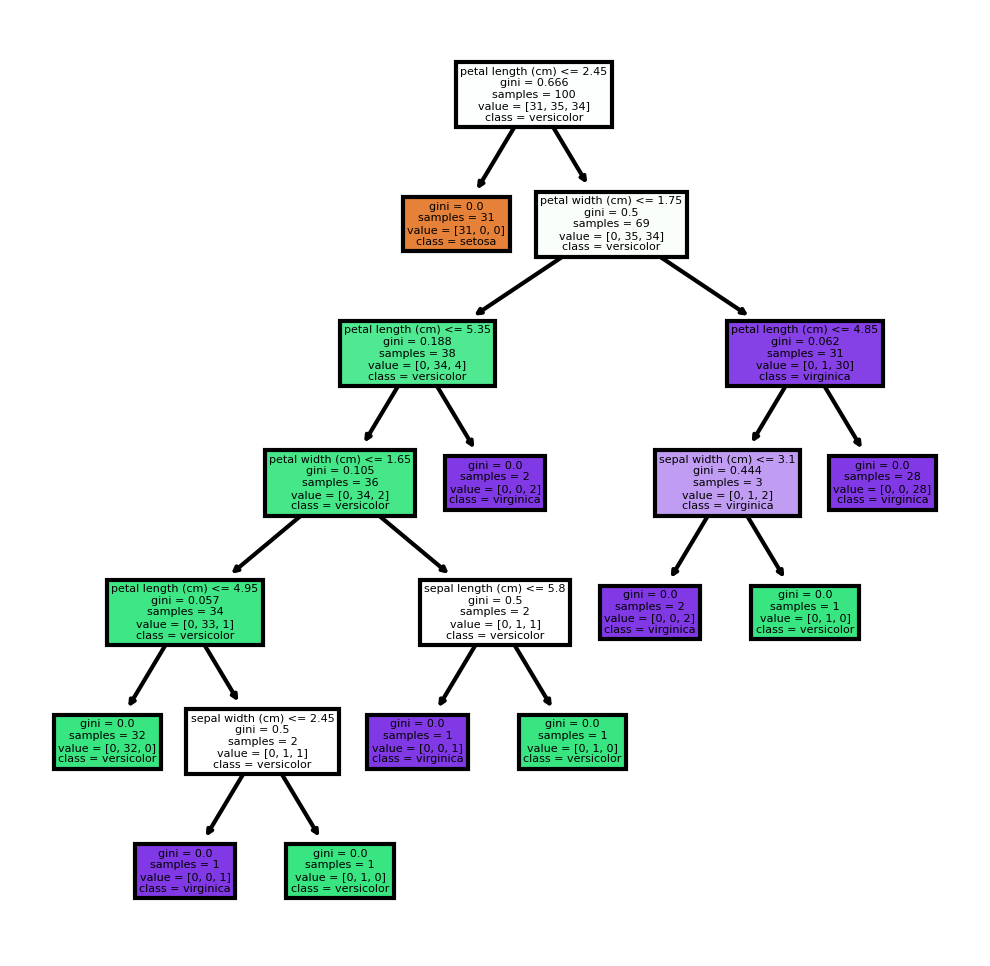

In [17]:
import matplotlib.pyplot as plt
from sklearn import tree
a=['sepal length (cm)','sepal width (cm)','petal length (cm)','petal width (cm)']
b=['setosa','versicolor','virginica']
fig, axes = plt.subplots(nrows = 1, ncols = 1, figsize = (4,4), dpi = 300)
tree.plot_tree(dtree, feature_names = a, class_names = b, filled = True);

In [18]:
print("Class Names = ",iris1.target_names)
print("Estimating Class Probabilities for flower whose petals length width are 4.7cm and 3.2cm and sepal length and width are 1.3cm and 0.2cm. ")
print('Output = ',tree_classifier.predict([[4.7, 3.2, 1.3, 0.2]]))
print("Our model predicts the class as 0, that is, setosa.")

Class Names =  ['setosa' 'versicolor' 'virginica']
Estimating Class Probabilities for flower whose petals length width are 4.7cm and 3.2cm and sepal length and width are 1.3cm and 0.2cm. 
Output =  [0]
Our model predicts the class as 0, that is, setosa.


In [19]:
print("Accuracy:",sm.accuracy_score(y_test, y_pred))

Accuracy: 1.0
